In [1]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
werewolf_df = pd.read_csv("Resources/werewolf_data.csv")

In [3]:
emergency_reason = werewolf_df["Emergency Reason"]
responder = emergency_reason.str.split(pat=":", n=- 1, expand=True)
werewolf_df["Responder"] = responder[0]
werewolf_df["Emergency Reason"] = responder[1]

werewolf_df = werewolf_df[["lat", "lng", "zip", "Emergency Reason", "Responder", "Town/City", "Date", "Moon Phase"]]
werewolf_df


# JINGOU
# Emergency reason vs New Moon
# Emergency reason vs Full Moon
# Pie chart for both full and new moon

,lat,lng,zip,Emergency Reason,Responder,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,BACK PAINS/INJURY,EMS,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,DIABETIC EMERGENCY,EMS,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,GAS-ODOR/LEAK,Fire,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,CARDIAC EMERGENCY,EMS,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,DIZZINESS,EMS,LOWER POTTSGROVE,2015-12-10,0.99
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,VEHICLE ACCIDENT -,Traffic,EAST NORRITON,2020-07-29,NaN
663518,40.136306,-75.428697,19403.0,GENERAL WEAKNESS,EMS,LOWER PROVIDENCE,2020-07-29,NaN
663519,40.013779,-75.300835,19041.0,VEHICLE ACCIDENT,EMS,LOWER MERION,2020-07-29,NaN
663520,40.121603,-75.351437,19401.0,BUILDING FIRE,Fire,NORRISTOWN,2020-07-29,NaN


In [4]:
# bin or remove
# 0 – new moon
# 0-0.25 – waxing crescent
# 0.25 – first quarter
# 0.25-0.5 – waxing gibbous
# 0.5 – full moon
# 0.5-0.75 – waning gibbous
# 0.75 – last quarter
# 0.75-1 – waning crescent

In [15]:
Newmoon = werewolf_df.loc[werewolf_df["Moon Phase"]==0, ['lat','lng','zip','Emergency Reason','Responder','Town/City','Date','Moon Phase']]
# Newmoon["Emergency Reason"].value_counts().head(10)
# Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].replace({'VEHICLE ACCIDENT -':'VEHICLE ACCIDENT', 
#                                                                    'DISABLED VEHICLE -':'DISABLED VEHICLE', 
#                                                                    'ROAD OBSTRUCTION -':'ROAD OBSTRUCTION'})
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('DISABLED VEHICLE -','DISABLED VEHICLE')
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('VEHICLE ACCIDENT -','VEHICLE ACCIDENT')
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('ROAD OBSTRUCTION -','ROAD OBSTRUCTION')
Newmoon["Emergency Reason"].value_counts()


 VEHICLE ACCIDENT         4934
 DISABLED VEHICLE         1073
 FIRE ALARM                945
 FALL VICTIM               868
 RESPIRATORY EMERGENCY     839
                          ... 
 TRANSFERRED CALL            2
 STABBING                    2
 RESCUE - TECHNICAL          2
 AMPUTATION                  1
 INDUSTRIAL ACCIDENT         1
Name: Emergency Reason, Length: 70, dtype: int64

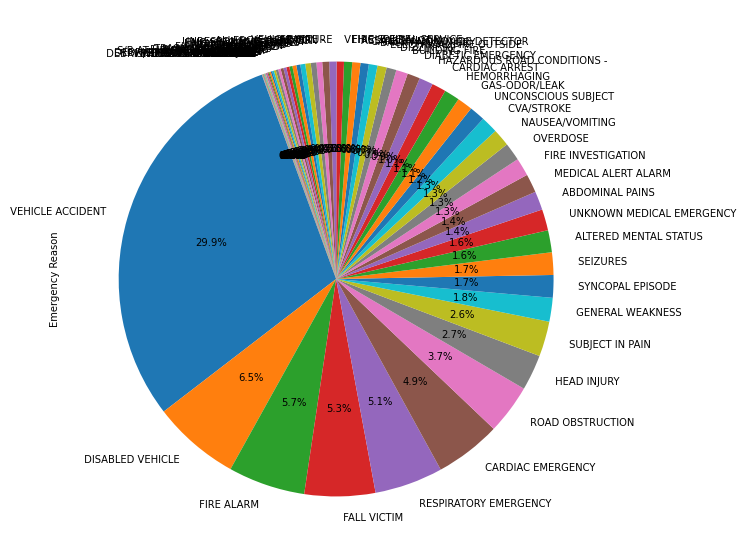

In [19]:
Newmoon['Emergency Reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, figsize=(18,10))
plt.savefig("Images/Newmoon_Jingou.png")

In [21]:
Fullmoon = werewolf_df.loc[werewolf_df["Moon Phase"]==0.5,['lat','lng','zip','Emergency Reason','Responder','Town/City','Date','Moon Phase']]
# Fullmoon["Emergency Reason"].value_counts().head()

Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('DISABLED VEHICLE -','DISABLED VEHICLE')
Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('VEHICLE ACCIDENT -','VEHICLE ACCIDENT')
Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('ROAD OBSTRUCTION -','ROAD OBSTRUCTION')

Fullmoon["Emergency Reason"].value_counts()

 VEHICLE ACCIDENT         9203
 DISABLED VEHICLE         2458
 FIRE ALARM               1976
 CARDIAC EMERGENCY        1679
 RESPIRATORY EMERGENCY    1626
                          ... 
 POLICE INFORMATION          2
 PUMP DETAIL                 2
 ELECTROCUTION               1
 DROWNING                    1
 PUBLIC SERVICE              1
Name: Emergency Reason, Length: 75, dtype: int64

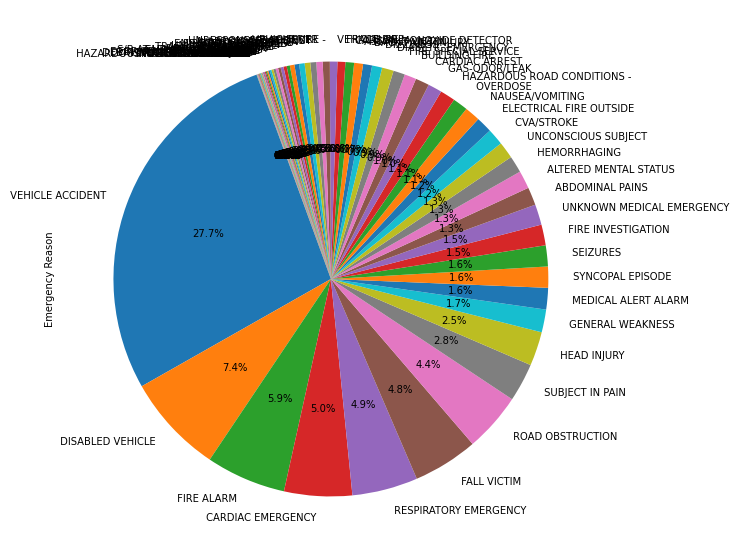

In [23]:
Fullmoon['Emergency Reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, figsize=(18,10))
plt.savefig("Images/Fullmoon_Jingou.png")